### Extract list of HLA-A11 samples

In [9]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir("/Users/ishaharris/Projects/TCR/TCR-Isha/data/Repertoires")

a11_metadata = pd.read_csv("Cohort01_Emerson_HLA-A11_metadata.tsv", sep="\t") 

a11_list = a11_metadata['sample_name'].tolist()

a11_metadata.loc[1,'sample_tags']

a11_cmv_annotation =a11_metadata[a11_metadata['sample_tags'].str.contains(r'\bcytomegalovirus|CNV\b', case=False, na=False)]

a11_cmv_annotation.shape
a11_metadata.shape



(61, 5)

In [17]:
#View the zip contents

import zipfile

source_zip = "/Users/ishaharris/Projects/TCR/TCR-Isha/data/Repertoires/emerson-2017-natgen.zip"
output_zip = "/Users/ishaharris/Projects/TCR/TCR-Isha/data/Repertoires/HLA-A11-emerson-2017-natgen.zip"


with zipfile.ZipFile(source_zip, 'r') as z:
    file_list = z.namelist()

for f in file_list:
    print(f)



P00076.tsv
Keck0076_MC1.tsv
P00402.tsv
P00655.tsv
Keck0067_MC1.tsv
P00181.tsv
P00334.tsv
P00043.tsv
P00580.tsv
P00636.tsv
P00233.tsv
P00131.tsv
P00411.tsv
P00452.tsv
P00637.tsv
P00208.tsv
P00409.tsv
P00356.tsv
P00246.tsv
P00210.tsv
P00159.tsv
P00063.tsv
P00365.tsv
P00094.tsv
Keck0021_MC1.tsv
P00140.tsv
P00306.tsv
P00113.tsv
P00157.tsv
P00209.tsv
P00148.tsv
P00558.tsv
P00611.tsv
P00333.tsv
P00400.tsv
P00169.tsv
P00340.tsv
P00228.tsv
P00372.tsv
Keck0055_MC1.tsv
P00539.tsv
P00199.tsv
P00497.tsv
P00142.tsv
P00449.tsv
P00046.tsv
P00424.tsv
P00175.tsv
P00370.tsv
P00256.tsv
P00026.tsv
P00250.tsv
P00248.tsv
P00036.tsv
P00191.tsv
P00591.tsv
P00362.tsv
Keck0087_MC1.tsv
P00619.tsv
P00266.tsv
P00269.tsv
P00330.tsv
P00448.tsv
P00523.tsv
P00450.tsv
P00651.tsv
Keck0075_MC1.tsv
P00308.tsv
P00632.tsv
P00466.tsv
P00035.tsv
Keck0020_MC1.tsv
P00562.tsv
P00247.tsv
P00541.tsv
P00067.tsv
Keck0053_MC1.tsv
P00399.tsv
P00171.tsv
P00048.tsv
P00310.tsv
P00494.tsv
P00254.tsv
P00590.tsv
P00384.tsv
P00099.tsv
P00414

In [ ]:
# Prepare the list to extract

extract_list = [s + '.tsv' for s in a11_list]
extract_list

'/Users/ishaharris/Projects/TCR/TCR-Isha/data/Repertoires/emerson-2017-natgen.zip'

In [ ]:
# New zip with selectedf iles

import zipfile
from tqdm import tqdm

source_zip = 'emerson-2017-natgen.zip'

#Create a zip for the wanted files
output_zip = 'HLA-A11-emerson-2017-natgen.zip'

total_written=0


# Extract the files from the source zip and write them to the output zip with tqdm progress bar
with zipfile.ZipFile(source_zip, 'r') as zin:
    with zipfile.ZipFile(output_zip, 'w', compression=zipfile.ZIP_DEFLATED) as zout:
        for file in tqdm(extract_list, desc="Copying files", unit="file"):
            try:
                data = zin.read(file)
                zout.writestr(file, data)
                total_written += len(data)
                print(f"added {file} ({len(data)/1024:.1f} KB) - Total: {total_written/1024:.1f} KB")
            except KeyError:
                print(f"File not found in zip: {file}")



In [19]:
#How big is the new zip?

total_uncompressed_size = 0

with zipfile.ZipFile(source_zip, 'r') as z:
    for info in z.infolist():
        total_uncompressed_size += info.file_size

print(f"Total uncompressed size: {total_uncompressed_size / (1024 * 1024):.2f} MB")


Total uncompressed size: 378276.53 MB


### Preview one repertoire

In [1]:
# Check working directory

import os
print(os.getcwd())

#Change directory to the data folder
os.chdir("/Volumes/IshaVerbat/Isha/TCR/All_Emerson_Cohort01")


/Users/ishaharris/Projects/TCR/TCR-Isha/notebooks


In [3]:
#Extract one file to preview
import zipfile

source_zip = "/Users/ishaharris/Projects/TCR/TCR-Isha/data/Repertoires/emerson-2017-natgen.zip"
output_zip = "/Users/ishaharris/Projects/TCR/TCR-Isha/data/Repertoires/HLA-A11-emerson-2017-natgen.zip"

with zipfile.ZipFile(output_zip, "r") as zip_ref:
    # List all files in the archive
    print(zip_ref.namelist())
    
    # Extract just one file
    zip_ref.extract("P00633.tsv", path="preview_folder/")


['P00633.tsv', 'P00143.tsv', 'P00572.tsv', 'P00311.tsv', 'P00419.tsv', 'P00281.tsv', 'P00542.tsv', 'P00187.tsv', 'P00555.tsv', 'P00243.tsv', 'P00553.tsv', 'P00431.tsv', 'P00611.tsv', 'P00021.tsv', 'P00092.tsv', 'P00494.tsv', 'P00033.tsv', 'P00249.tsv', 'P00108.tsv', 'P00169.tsv', 'P00175.tsv', 'P00060.tsv', 'P00127.tsv', 'P00117.tsv', 'P00428.tsv', 'P00495.tsv', 'P00562.tsv', 'P00270.tsv', 'P00516.tsv', 'P00279.tsv', 'P00647.tsv', 'P00282.tsv', 'P00434.tsv', 'P00585.tsv', 'P00409.tsv', 'P00376.tsv', 'P00489.tsv', 'P00025.tsv', 'P00267.tsv', 'P00004.tsv', 'P00023.tsv', 'P00099.tsv', 'P00090.tsv', 'P00168.tsv', 'P00331.tsv', 'P00339.tsv', 'P00263.tsv', 'P00414.tsv', 'P00261.tsv', 'P00283.tsv', 'P00215.tsv', 'P00217.tsv', 'P00509.tsv', 'P00651.tsv', 'P00653.tsv', 'P00388.tsv', 'P00636.tsv', 'P00612.tsv', 'P00529.tsv', 'P00578.tsv', 'P00444.tsv']


In [1]:
# Read the previewed file 

import pandas as pd

filepath="/Volumes/IshaVerbat/Isha/TCR/All_Emerson_Filtered/P00311.tsv"
preview_rep = pd.read_csv(filepath, sep="\t")

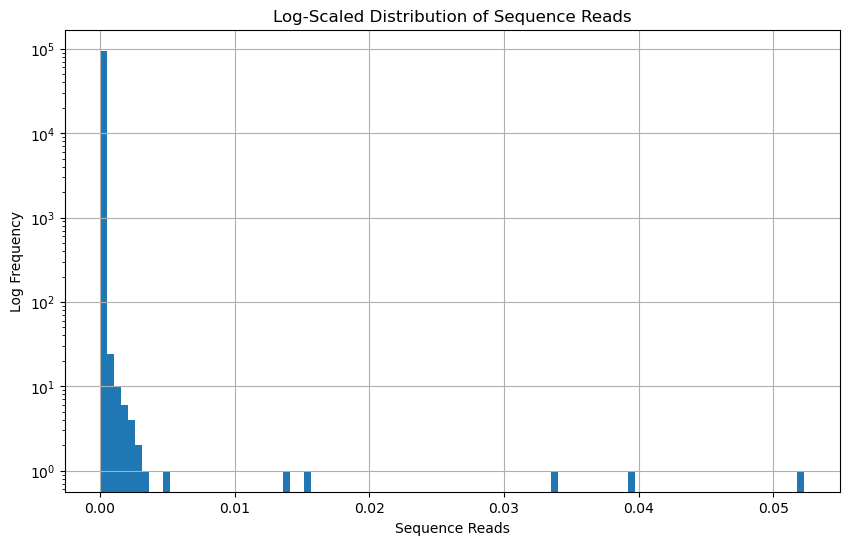

In [26]:
import numpy as np

# Log-scaled histogram
plt.figure(figsize=(10, 6))
plt.hist(preview_rep['frequency'], bins=100, log=True)
plt.xlabel('Sequence Reads')
plt.ylabel('Log Frequency')
plt.title('Log-Scaled Distribution of Sequence Reads')
plt.grid(True)
plt.show()



In [2]:
preview_rep_clean = preview_rep.dropna(subset=['amino_acid'])
preview_rep_clean.shape
preview_rep.shape

(94664, 5)

In [ ]:
import matplotlib.pyplot as plt

#Visualise the file
preview_rep.head()

#Check how many samples are in the file
preview_rep.shape

#Check the columns
preview_rep.columns

#Inspect TCRb

for i in range(0,5):
    print(preview_rep.loc[i,'amino_acid'])

#How many NaNs are in the TCRb column?
nan_count = preview_rep['amino_acid'].isna().sum()
print(f"Number of NaN values in amino_acid: {nan_count}")
#What is the fraction of NaN?
nan_fraction = nan_count / preview_rep.shape[0]
print(f"Fraction of NaN values in amino_acid: {nan_fraction:.2%}")

#How many unique TCRb sequences are there?
unique_tcrb = preview_rep['amino_acid'].nunique()
print(f"Number of unique TCRb sequences: {unique_tcrb}")

# Number of repeated TCRb sequences
repeated_tcrb = preview_rep['amino_acid'].duplicated().sum()
print(f"Number of repeated TCRb sequences: {repeated_tcrb}")

#Bar chart of clonotypes

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(preview_rep_clean.['amino_acid'],preview_rep_clean['frequency'])

plt.xlabel("CDR3 Amino Acid Sequence")
plt.ylabel("Freq")
plt.title("Clonotype Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

CASSFGSIYGYTF
nan
nan
CASSLGQGGGQPQHF
CASSLNRGGTGELFF
Number of NaN values in amino_acid: 13545
Fraction of NaN values in amino_acid: 14.31%
Number of unique TCRb sequences: 76211
Number of repeated TCRb sequences: 18452


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x10b48a340> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [1]:
preview_rep

NameError: name 'preview_rep' is not defined

In [5]:


clonotype_counts = pd.Series(data=preview_rep_clean['frequency'], index=preview_rep['amino_acid'])

# # Plot histogram of counts
# plt.figure(figsize=(10, 6))
# plt.hist(clonotype_counts, bins=50, edgecolor='black')

# plt.xlabel("Clonotype Count (Number of times seen)")
# plt.ylabel("Number of Unique Clonotypes")
# plt.title("Distribution of Clonotype Frequencies")
# plt.yscale("log")  # optional: log scale for clarity
# plt.grid(False)
# plt.tight_layout()
# plt.show()

In [7]:
preview_rep

,rearrangement,amino_acid,templates,seq_reads,frequency
0,AATGTGAACGCCTTGTTGCTGGGGGACTCGGCCCTGTATCTCTGTG...,CASSFGSIYGYTF,NaN,2,0.000003
1,ATGTGAACGCCTTGTTGCTGGGGGACTCGGCCCTGTATCTCTGTGC...,NaN,NaN,2,0.000003
2,TGCTGGGGGACTCGGCCCTGTATCTCTGTGCCAGCAGCCCCGGGTG...,NaN,NaN,2,0.000003
3,AACGCCTTGTTGCTGGGGGACTCGGCCCTGTATCTCTGTGCCAGCA...,CASSLGQGGGQPQHF,NaN,3,0.000004
4,AACGCCTTGTTGCTGGGGGACTCGGCCCTGTATCTCTGTGCCAGCA...,CASSLNRGGTGELFF,NaN,4,0.000005
...,...,...,...,...,...
94659,GTGACCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTG...,CSATTGVTGYEQYF,NaN,69,0.000090
94660,CCTGAAGACAGCAGCTTCTACATCTGCAGTGCTAGAGAGGTACAAA...,CSAREVQSVEPSGDNEQFF,NaN,86,0.000112
94661,TCAATTCCCTGGAGCTTGGTGACTCTGCTGTGTATTTCTGTGCCAG...,NaN,NaN,118,0.000154
94662,CTGGAGCTTGGTGACTCTGCTGTGTATTTCTGTGCCAGCAGCCAAG...,CASSQGGGFSSGNTIYF,NaN,176,0.000230


In [9]:
# Generate a list of the unique TCRs
unique_tcrs = preview_rep['cdr3_amino_acid'].dropna().unique()
print(f"Number of unique TCRs: {len(unique_tcrs)}")
unique_tcrs[:10]

Number of unique TCRs: 213821


array(['CASSLEGRYQETQYF', 'CASSLV*RASYEQYF', 'CASSLQGTTNYGYTF',
       'CASSLASDSYEQYF', 'CASSLWAGQETQYF', 'CASSPGRSNYGYTF',
       'CASSRDWGAGGKETQYF', 'CASSSSGTGVQPQHF', 'CASSEDGRNEQYF',
       'CASSSWGAGNEQYF'], dtype=object)

### CMV annotation filtering and..
#### How many CMV+ and CMV- do we have?

In [2]:
cmv_positive_indices = a11_metadata['sample_tags'].str.contains('Cytomegalovirus \+', case=True, na=False)
cmv_negative_indices = a11_metadata['sample_tags'].str.contains('Cytomegalovirus \-', case=True, na=False)

neither_cmv = ~a11_metadata['sample_tags'].str.contains('Cytomegalovirus \+', na=False) & \
           ~a11_metadata['sample_tags'].str.contains('Cytomegalovirus \-', na=False)




In [4]:
a11_metadata.loc[2,'sample_tags']

'24-45 Years (Middle Adulthood), 35-39 Years, 35-60 Years, 37 Years, Caucasian, Cohort 01, Cytomegalovirus +, HLA-A*02, HLA-A*11, HLA-B*35, HLA-B*44, Inferred CMV +, Inferred HLA-A*02, Inferred HLA-A*11, Inferred HLA-A*29, Inferred HLA-B*35, Inferred HLA-B*44, Male, Non-Hispanic or Latino, PBMC, Peripheral blood lymphocytes (PBL), T cells, gDNA'

In [5]:
cmv_positive_indices.sum()

np.int64(27)

In [6]:
cmv_negative_indices.sum()

np.int64(32)

In [7]:
neither_cmv.sum()

np.int64(2)

In [8]:
a11_metadata.shape

(61, 5)

In [9]:
a11_metadata[neither_cmv]


,sample_name,total_rearrangements,productive_rearrangements,productive_clonality,sample_tags
0,P00633,284760,229728,0.0495,"Cohort 01, HLA-A*02, HLA-A*11, HLA-B*35, Infer..."
33,P00585,257171,209861,0.1062,"Cohort 01, HLA MHC Class I, HLA-A*11, HLA-A*32..."


In [ ]:
# Generate a list of file names which have CMV annotation

a11_cmv_annotation =a11_metadata[a11_metadata['sample_tags'].str.contains(r'\bcytomegalovirus|CNV\b', case=False, na=False)]

a11_cmv_annotation.head()

cmv_annotated_list = a11_cmv_annotation['sample_name'].tolist()

#Add .tsv to the list

cmv_tsv_file_names = [f"{p}.tsv" for p in cmv_annotated_list]

len(cmv_tsv_file_names)

# Output file names to a text file


59

#### Create repertoire dataframe.

1. Extract the zip file
2. Count clonotypes and counts
3. Append to a data frame
4. Loop through all samples (61)

I want a df that looks like this: \
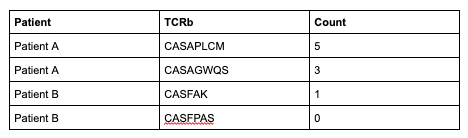

In [2]:
# Extract the zip 

import zipfile
import os
from tqdm import tqdm

zip_path = '/Volumes/IshaVerbat/Isha/TCR/emerson-2017-natgen.zip'
extract_path = '/Volumes/IshaVerbat/Isha/TCR/All_Emerson_Cohort01'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    members = zip_ref.infolist()  
    for member in tqdm(members, desc="Extracting files", unit="file"):
        zip_ref.extract(member, extract_path)

Extracting files:   0%|          | 0/786 [00:00<?, ?file/s]

Extracting files: 100%|██████████| 786/786 [1:10:52<00:00,  5.41s/file]


In [9]:
# Set working directory 
import os
from tqdm import tqdm
import pandas as pd

os.chdir("/Users/ishaharris/Projects/TCR/TCR-Isha/data/Repertoires/Emerson_Cohort01")
i = 0


# Preview the first file
file_name = cmv_tsv_files[i]
# Read the file
preview_rep = pd.read_csv(file_name, sep="\t")

preview_rep.head()


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_56584/2829434954.py:13: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  preview_rep = pd.read_csv(file_name, sep="\t")


,sample_name,species,locus,product_subtype,kit_pool,sku,test_name,sample_catalog_tags,sample_rich_tags,sample_rich_tags_json,...,cdr3_rearrangement,cdr3_amino_acid,cdr3_start_index,cdr3_rearrangement_length,chosen_v_family,chosen_v_gene,chosen_v_allele,chosen_j_family,chosen_j_gene,chosen_j_allele
0,P00143,Human,TCRB,Deep,NaN,NaN,NaN,"Biological Sex:Male,Ethnic Group:Unknown Ethni...",NaN,NaN,...,TGTGCCAGCAGCCCGACTTCCCAAGAGACCCAGTACTTC,CASSPTSQETQYF,327.0,39,TCRBV05,5.0,1.0,TCRBJ02,5.0,1.0
1,P00143,Human,TCRB,Deep,NaN,NaN,NaN,"Biological Sex:Male,Ethnic Group:Unknown Ethni...",NaN,NaN,...,TGTGCCAGCAGCTGGGTCAGACAGCCTCAAGAGACCCAGTACTTC,CASSWVRQPQETQYF,327.0,45,TCRBV05,5.0,1.0,TCRBJ02,5.0,1.0
2,P00143,Human,TCRB,Deep,NaN,NaN,NaN,"Biological Sex:Male,Ethnic Group:Unknown Ethni...",NaN,NaN,...,TGTGCCAGCAGTTACGTCTCCGGGGGGCAAGAGACCCAGTACTTC,CASSYVSGGQETQYF,327.0,45,TCRBV05,5.0,1.0,TCRBJ02,5.0,1.0
3,P00143,Human,TCRB,Deep,NaN,NaN,NaN,"Biological Sex:Male,Ethnic Group:Unknown Ethni...",NaN,NaN,...,TGTGCCAGCAGCTTATATCGCCAGGGGGCTGAGACCCAGTACTTC,CASSLYRQGAETQYF,327.0,45,TCRBV05,5.0,1.0,TCRBJ02,5.0,1.0
4,P00143,Human,TCRB,Deep,NaN,NaN,NaN,"Biological Sex:Male,Ethnic Group:Unknown Ethni...",NaN,NaN,...,TGTGCCAGCAGCTTGGCCCCCCTAGACCAAGAGACCCAGTACTTC,CASSLAPLDQETQYF,327.0,45,TCRBV05,5.0,1.0,TCRBJ02,5.0,1.0


Ignore below - just testing things

In [19]:
file = cmv_tsv_file_names[0]

rep = pd.read_csv(file, sep="\t")

rep.head()

/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_56584/1536992221.py:3: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


,sample_name,species,locus,product_subtype,kit_pool,sku,test_name,sample_catalog_tags,sample_rich_tags,sample_rich_tags_json,...,cdr3_rearrangement,cdr3_amino_acid,cdr3_start_index,cdr3_rearrangement_length,chosen_v_family,chosen_v_gene,chosen_v_allele,chosen_j_family,chosen_j_gene,chosen_j_allele
0,P00143,Human,TCRB,Deep,NaN,NaN,NaN,"Biological Sex:Male,Ethnic Group:Unknown Ethni...",NaN,NaN,...,TGTGCCAGCAGCCCGACTTCCCAAGAGACCCAGTACTTC,CASSPTSQETQYF,327.0,39,TCRBV05,5.0,1.0,TCRBJ02,5.0,1.0
1,P00143,Human,TCRB,Deep,NaN,NaN,NaN,"Biological Sex:Male,Ethnic Group:Unknown Ethni...",NaN,NaN,...,TGTGCCAGCAGCTGGGTCAGACAGCCTCAAGAGACCCAGTACTTC,CASSWVRQPQETQYF,327.0,45,TCRBV05,5.0,1.0,TCRBJ02,5.0,1.0
2,P00143,Human,TCRB,Deep,NaN,NaN,NaN,"Biological Sex:Male,Ethnic Group:Unknown Ethni...",NaN,NaN,...,TGTGCCAGCAGTTACGTCTCCGGGGGGCAAGAGACCCAGTACTTC,CASSYVSGGQETQYF,327.0,45,TCRBV05,5.0,1.0,TCRBJ02,5.0,1.0
3,P00143,Human,TCRB,Deep,NaN,NaN,NaN,"Biological Sex:Male,Ethnic Group:Unknown Ethni...",NaN,NaN,...,TGTGCCAGCAGCTTATATCGCCAGGGGGCTGAGACCCAGTACTTC,CASSLYRQGAETQYF,327.0,45,TCRBV05,5.0,1.0,TCRBJ02,5.0,1.0
4,P00143,Human,TCRB,Deep,NaN,NaN,NaN,"Biological Sex:Male,Ethnic Group:Unknown Ethni...",NaN,NaN,...,TGTGCCAGCAGCTTGGCCCCCCTAGACCAAGAGACCCAGTACTTC,CASSLAPLDQETQYF,327.0,45,TCRBV05,5.0,1.0,TCRBJ02,5.0,1.0


In [22]:
rep['cdr3_amino_acid'].value_counts()


cdr3_amino_acid
CASSLDLTGSTEAFF       23
CASSLGGNTEAFF         19
CASSLGPNTEAFF         19
CASSLQGNTEAFF         18
CASSLSYEQYF           16
                      ..
CASSPTSQETQYF          1
CASSSQTGGNYGYTF        1
CASSLMGVGLDGYTF        1
CASHHKSLSSGWSNEQFF     1
CASSETGGWEETQYF        1
Name: count, Length: 159525, dtype: int64

In [ ]:
# Load in IM3 data

os.chdir('/Users/ishaharris/Projects/TCR/TCR-Isha/data/Processed')
im3 = pd.read_csv('CMV_clono_cdr3_count.csv', sep=',')

im3.head()



(448, 3)

In [7]:
#Extract just the TRBs from CMV

im3_tcr=im3.loc[:,'cdr3s_aa']

im3_tcrb=im3_tcr.apply(lambda x: re.search(r'TRB:([^;]+)', x).group(1) if 'TRB:' in x else None)

im3_tcrb=im3_tcrb.dropna()

unique_im3_tcrb=im3_tcrb.unique()
print(f"Number of unique TCRb sequences in IM3: {len(unique_im3_tcrb)}")

Number of unique TCRb sequences in IM3: 30


In [5]:
clono_count = rep['cdr3_amino_acid'].value_counts()

hits = clono_count[clono_count.index.isin(unique_im3_tcrb)]

NameError: name 'rep' is not defined

In [53]:
hits

Series([], Name: count, dtype: int64)

Write the actual loop

In [ ]:
#################### Don't need to run this again as have exported to data/Processed ##################

# List of file names: cmv_tsv_file_names

# Loop through the files and calculate value_counts.
# Extract any TCRb sequences that are present in my list of CMV associated pepties. 
# For positive hits, extract the TCRb sequence and the number of times it was seen in the repertoire.

os.chdir('/Users/ishaharris/Projects/TCR/TCR-Isha/data/Repertoires/Emerson_Cohort01')

records = []
for i, file in enumerate(cmv_tsv_file_names, start=1):
    # Print progress
    print(f"Processing file {i}/{len(cmv_tsv_file_names)}: {file}")
    
    # Patient ID
    patient_id = file.split('.')[0]
    # Read the file
    rep = pd.read_csv(file, sep="\t")

    clono_count = rep['cdr3_amino_acid'].value_counts()

    # Get the TCRb sequences that are present in the list of CMV associated peptides
    hits = clono_count[clono_count.index.isin(unique_im3_tcrb)]

    for seq, counts in hits.items():
        records.append({
            'patient_id': patient_id,
            'sequence': seq,
            'count': counts
        })
    
    
# Create a DataFrame from the records
records_df = pd.DataFrame(records)



Processing file 1/59: P00143.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 2/59: P00572.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 3/59: P00311.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 4/59: P00419.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 5/59: P00281.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 6/59: P00542.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 7/59: P00187.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 8/59: P00555.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 9/59: P00243.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 10/59: P00553.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 11/59: P00431.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 12/59: P00611.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 13/59: P00021.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 14/59: P00092.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 15/59: P00494.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 16/59: P00033.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 17/59: P00249.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,86,88,93) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 18/59: P00108.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 19/59: P00169.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 20/59: P00175.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 21/59: P00060.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 22/59: P00127.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 23/59: P00117.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 24/59: P00428.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 25/59: P00495.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 26/59: P00562.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 27/59: P00270.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 28/59: P00516.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 29/59: P00279.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 30/59: P00647.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 31/59: P00282.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 32/59: P00434.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 33/59: P00409.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 34/59: P00376.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 35/59: P00489.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 36/59: P00025.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 37/59: P00267.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 38/59: P00004.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 39/59: P00023.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 40/59: P00099.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 41/59: P00090.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 42/59: P00168.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 43/59: P00331.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,88) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 44/59: P00339.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 45/59: P00263.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 46/59: P00414.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 47/59: P00261.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 48/59: P00283.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 49/59: P00215.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 50/59: P00217.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 51/59: P00509.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 52/59: P00651.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 53/59: P00653.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 54/59: P00388.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 55/59: P00636.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 56/59: P00612.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 57/59: P00529.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 58/59: P00578.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing file 59/59: P00444.tsv


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2145230229.py:17: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


In [ ]:
records_df.shape

records_df

#This is saved as cmv-associated_repertoires.csv in data/Processed

NameError: name 'records_df' is not defined

Check whether each of the patients with matched sequences are positive

In [20]:
a11_metadata

,sample_name,total_rearrangements,productive_rearrangements,productive_clonality,sample_tags
0,P00633,284760,229728,0.0495,"Cohort 01, HLA-A*02, HLA-A*11, HLA-B*35, Infer..."
1,P00143,201686,171599,0.0510,"Cohort 01, Cytomegalovirus +, HLA-A*02, HLA-A*..."
2,P00572,12937,10986,0.1169,"24-45 Years (Middle Adulthood), 35-39 Years, 3..."
3,P00311,94664,80045,0.1432,"Cohort 01, Cytomegalovirus -, HLA-A*02, HLA-A*..."
4,P00419,129090,106186,0.0590,"18-24 Years (Early Adulthood), 18-35 Years, 20..."
...,...,...,...,...,...
56,P00636,244493,202287,0.0729,"24-45 Years (Middle Adulthood), 35-60 Years, 4..."
57,P00612,174386,136005,0.0776,"35-60 Years, 45-65 Years (Late Adulthood), 60 ..."
58,P00529,105882,85881,0.2254,"18-24 Years (Early Adulthood), 18-35 Years, 20..."
59,P00578,258248,207286,0.0730,"35-60 Years, 45-49 Years, 45-65 Years (Late Ad..."


In [16]:
#Gets indices of positive and negative 
cmv_positive_indices = a11_metadata['sample_tags'].str.contains(r'\bcytomegalovirus \+|\bcmv \+\b', case=False, na=False)

cmv_negative_indices = a11_metadata['sample_tags'].str.contains(r'\bcytomegalovirus \-|\bcmv \-\b', case=False, na=False)

#Gets list of positive and negative

# Extract patient IDs for CMV positive and negative
list_cmv_positive_ids = a11_metadata.loc[cmv_positive_indices, 'sample_name'].unique().tolist()

list_cmv_negative_ids = a11_metadata.loc[cmv_negative_indices, 'sample_name'].unique().tolist()


In [ ]:
# Adds a column to the records_df to indicate if the patient is CMV positive or negative

records_df['cmv_status'] = records_df['patient_id'].apply(lambda x: 'Positive' if x in list_cmv_positive_ids else 'Negative')

#cmv-associated_repertoires.csv has CMV status in it

In [ ]:
records_df


#Write the dataframe to a csv
records_df.to_csv('/Users/ishaharris/Projects/TCR/TCR-Isha/data/Processed/cmv-associated_repertoires.csv', index=False)
######### importat that this is saved!

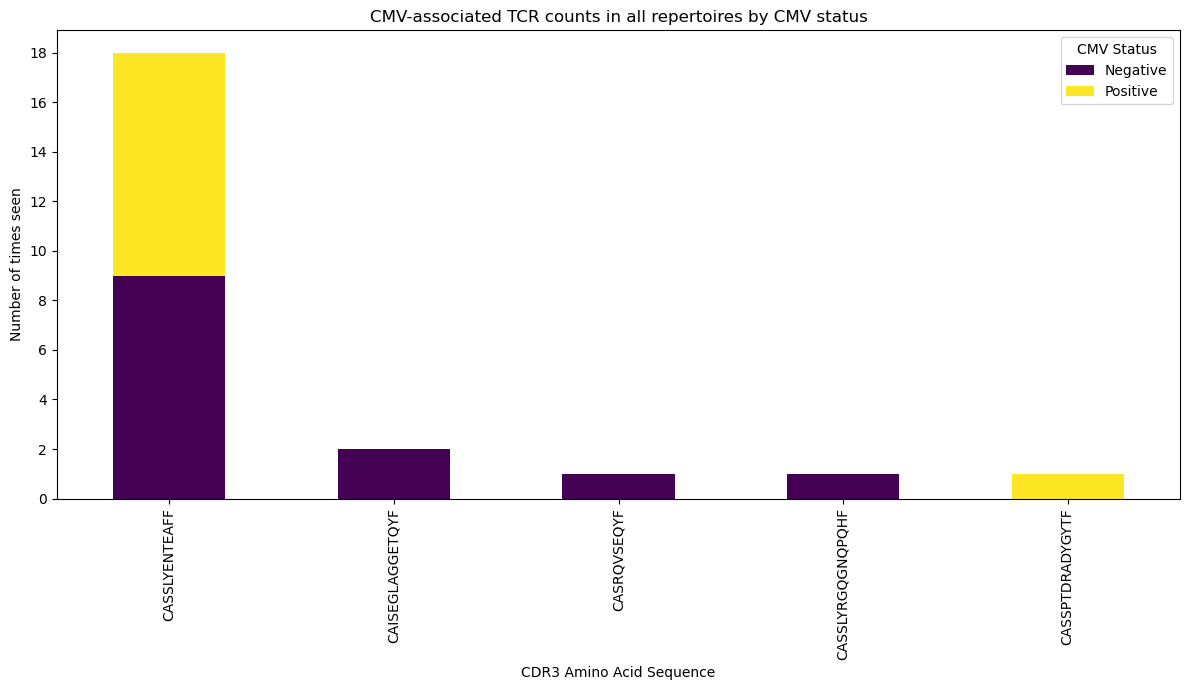

In [23]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt

# Count occurrences of each sequence within each CMV status
sequence_status_counts = records_df.groupby(['sequence', 'cmv_status']).size().unstack(fill_value=0)

# Sort by total counts (optional, for better visualization)
sequence_status_counts = sequence_status_counts.loc[sequence_status_counts.sum(axis=1).sort_values(ascending=False).index]

# Plot
sequence_status_counts.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')

plt.xlabel("CDR3 Amino Acid Sequence")
plt.ylabel("Number of times seen")
plt.title("CMV-associated TCR counts in all repertoires by CMV status")
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(title="CMV Status")
plt.tight_layout()
plt.show()


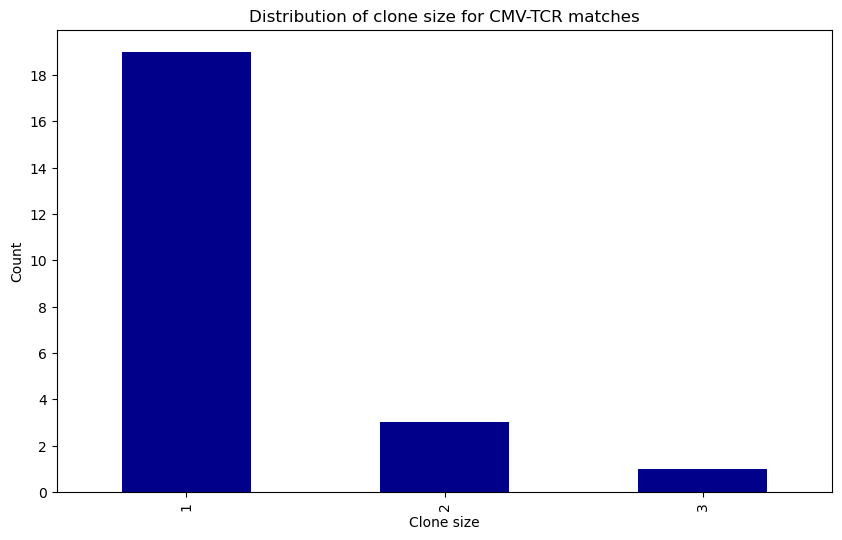

In [127]:
#Distribution of sequences by clone size
cmv_status_counts = records_df['count'].value_counts()

plt.figure(figsize=(10, 6))
cmv_status_counts.plot(kind='bar', color='darkblue')
plt.xlabel("Clone size")
plt.ylabel("Count")
plt.title("Distribution of clone size for CMV-TCR matches")
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

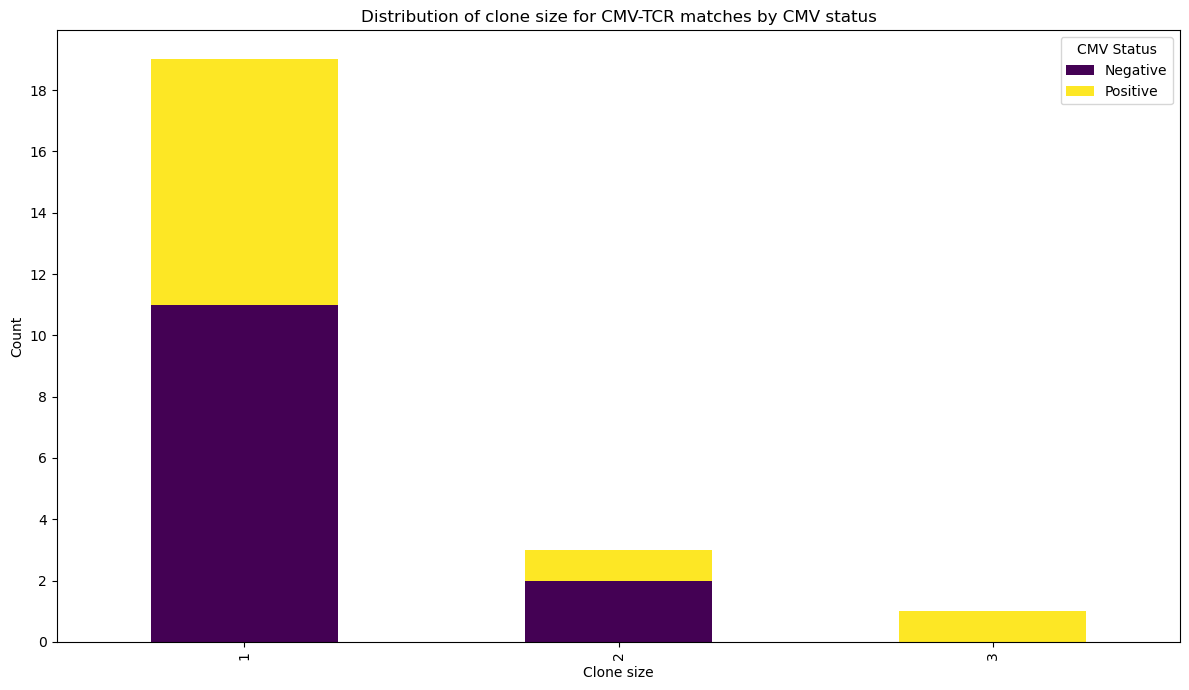

In [ ]:
# GPT grap

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'cmv_status' column exists in records_df with values like 'Positive' and 'Negative'
# Group by both 'count' (clone size) and 'cmv_status'
grouped = records_df.groupby(['count', 'cmv_status']).size().unstack(fill_value=0)

# # Sort by clone size if desired
# grouped = grouped.sort_index()

# Plot
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.xlabel("Clone size")
plt.ylabel("Count")
plt.title("Distribution of clone size for CMV-TCR matches by CMV status")
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(title="CMV Status")
plt.tight_layout()
plt.show()


## Visualising level of clonal expansion

I suspect there won't be a huge amount of clonal expansion seen in the repertoires in general. Let's test it out.

- Cumulative clone size distribution 
- Lorenz curves?

In [153]:
# n = the repertoire we're visualising
n = 21
file = cmv_tsv_file_names[n]
rep = pd.read_csv(file, sep="\t")



/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_56584/2579569766.py:4: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


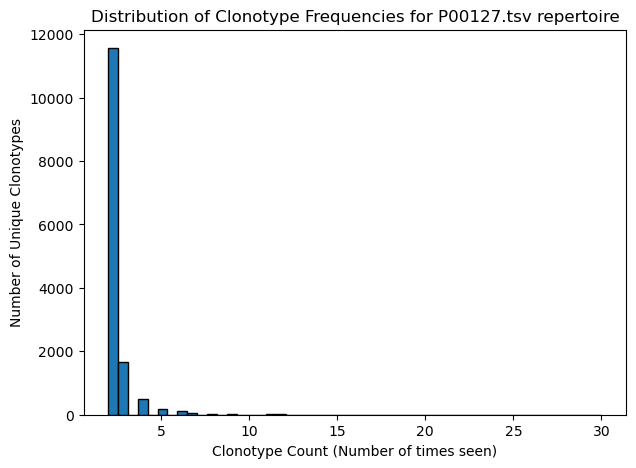

In [154]:
clono_count=rep['cdr3_amino_acid'].value_counts()
clono_count=clono_count[clono_count>1]
# Plot histogram of counts
plt.figure(figsize=(7, 5))
plt.hist(clono_count, bins=50, edgecolor='black')
plt.xlabel("Clonotype Count (Number of times seen)")
plt.ylabel("Number of Unique Clonotypes")
plt.title(f"Distribution of Clonotype Frequencies for {file} repertoire")
plt.show()

In [48]:
# Histograms for all repertoires

cmv_annotated_list

['P00143',
 'P00572',
 'P00311',
 'P00419',
 'P00281',
 'P00542',
 'P00187',
 'P00555',
 'P00243',
 'P00553',
 'P00431',
 'P00611',
 'P00021',
 'P00092',
 'P00494',
 'P00033',
 'P00249',
 'P00108',
 'P00169',
 'P00175',
 'P00060',
 'P00127',
 'P00117',
 'P00428',
 'P00495',
 'P00562',
 'P00270',
 'P00516',
 'P00279',
 'P00647',
 'P00282',
 'P00434',
 'P00409',
 'P00376',
 'P00489',
 'P00025',
 'P00267',
 'P00004',
 'P00023',
 'P00099',
 'P00090',
 'P00168',
 'P00331',
 'P00339',
 'P00263',
 'P00414',
 'P00261',
 'P00283',
 'P00215',
 'P00217',
 'P00509',
 'P00651',
 'P00653',
 'P00388',
 'P00636',
 'P00612',
 'P00529',
 'P00578',
 'P00444']

In [17]:
cmv_tsv_file_names

['P00143.tsv',
 'P00572.tsv',
 'P00311.tsv',
 'P00419.tsv',
 'P00281.tsv',
 'P00542.tsv',
 'P00187.tsv',
 'P00555.tsv',
 'P00243.tsv',
 'P00553.tsv',
 'P00431.tsv',
 'P00611.tsv',
 'P00021.tsv',
 'P00092.tsv',
 'P00494.tsv',
 'P00033.tsv',
 'P00249.tsv',
 'P00108.tsv',
 'P00169.tsv',
 'P00175.tsv',
 'P00060.tsv',
 'P00127.tsv',
 'P00117.tsv',
 'P00428.tsv',
 'P00495.tsv',
 'P00562.tsv',
 'P00270.tsv',
 'P00516.tsv',
 'P00279.tsv',
 'P00647.tsv',
 'P00282.tsv',
 'P00434.tsv',
 'P00409.tsv',
 'P00376.tsv',
 'P00489.tsv',
 'P00025.tsv',
 'P00267.tsv',
 'P00004.tsv',
 'P00023.tsv',
 'P00099.tsv',
 'P00090.tsv',
 'P00168.tsv',
 'P00331.tsv',
 'P00339.tsv',
 'P00263.tsv',
 'P00414.tsv',
 'P00261.tsv',
 'P00283.tsv',
 'P00215.tsv',
 'P00217.tsv',
 'P00509.tsv',
 'P00651.tsv',
 'P00653.tsv',
 'P00388.tsv',
 'P00636.tsv',
 'P00612.tsv',
 'P00529.tsv',
 'P00578.tsv',
 'P00444.tsv']

Processing P00143.tsv (1/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00572.tsv (2/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00311.tsv (3/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00419.tsv (4/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00281.tsv (5/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00542.tsv (6/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00187.tsv (7/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00555.tsv (8/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00243.tsv (9/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00553.tsv (10/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00431.tsv (11/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00611.tsv (12/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00021.tsv (13/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00092.tsv (14/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00494.tsv (15/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00033.tsv (16/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00249.tsv (17/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,86,88,93) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00108.tsv (18/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00169.tsv (19/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00175.tsv (20/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00060.tsv (21/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00127.tsv (22/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00117.tsv (23/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00428.tsv (24/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00495.tsv (25/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00562.tsv (26/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00270.tsv (27/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00516.tsv (28/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00279.tsv (29/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00647.tsv (30/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00282.tsv (31/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00434.tsv (32/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00409.tsv (33/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00376.tsv (34/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00489.tsv (35/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00025.tsv (36/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00267.tsv (37/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00004.tsv (38/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00023.tsv (39/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00099.tsv (40/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00090.tsv (41/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00168.tsv (42/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00331.tsv (43/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,88) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00339.tsv (44/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00263.tsv (45/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00414.tsv (46/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00261.tsv (47/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00283.tsv (48/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00215.tsv (49/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00217.tsv (50/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00509.tsv (51/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00651.tsv (52/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00653.tsv (53/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00388.tsv (54/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00636.tsv (55/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00612.tsv (56/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00529.tsv (57/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00578.tsv (58/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Processing P00444.tsv (59/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_65145/1770828597.py:22: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


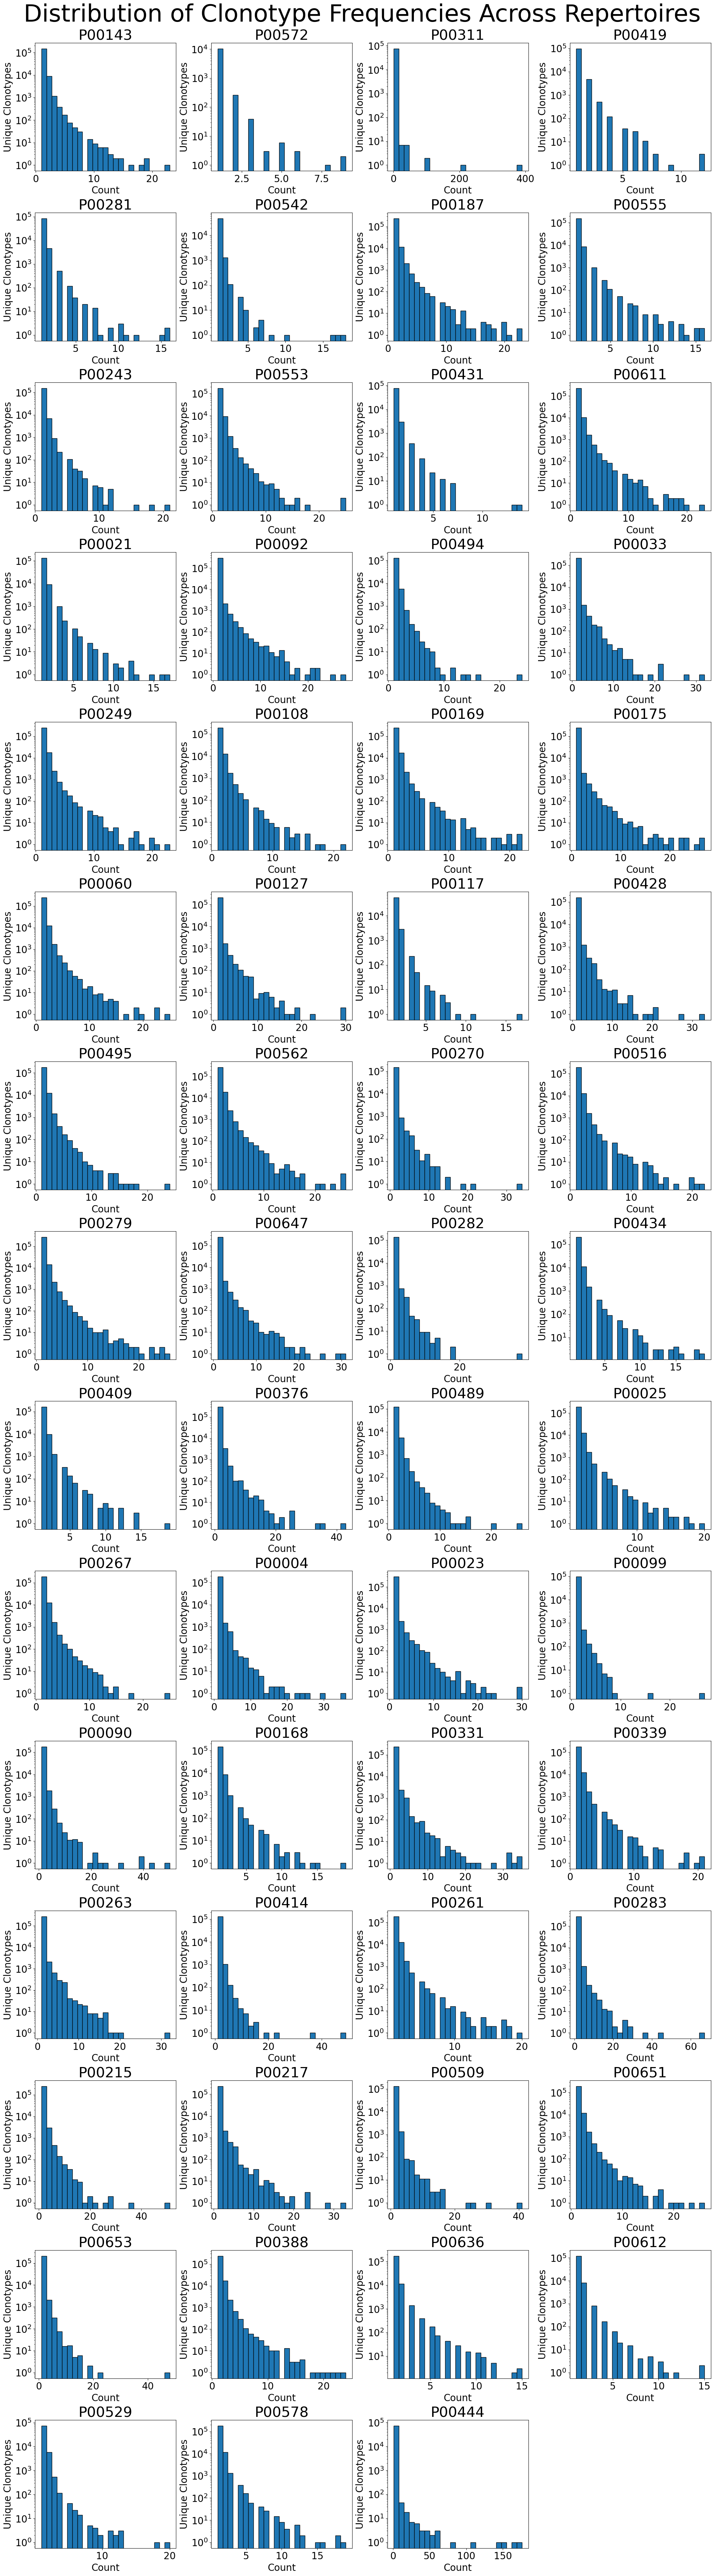

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ishaharris/Projects/TCR/TCR-Isha/data/figs/Distribution_of_Clonotype_Frequencies_Across_Repertoires.png'

<Figure size 640x480 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
os.chdir("/Users/ishaharris/Projects/TCR/TCR-Isha/data/Repertoires/Emerson_Cohort01")

# Adjust depending on how many files you have
num_files = len(cmv_tsv_file_names)
cols = 4  # Number of columns in the subplot grid
rows = (num_files // cols) + (num_files % cols > 0)

fig_width = 21
fig_height = 5 * rows

fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height),constrained_layout=True)
axes = axes.flatten()

# Second pass: plot with uniform x axis
for n in range(num_files):  # Adjust to actual number of files or range(num_files)
    file = cmv_tsv_file_names[n]

    print(f"Processing {file} ({n+1}/{num_files})...")

    rep = pd.read_csv(file, sep="\t")
    clono_count = rep['cdr3_amino_acid'].value_counts()
    #clono_count = clono_count[clono_count > 1]

    axes[n].hist(clono_count, bins=25, edgecolor='black')
    axes[n].set_yscale("log")
    #axes[n].set_xlim(global_min, global_max)
    axes[n].set_title(file.replace('.tsv', ''), fontsize=30)
    axes[n].set_xlabel("Count", fontsize=20)
    axes[n].set_ylabel("Unique Clonotypes", fontsize=20)
    axes[n].tick_params(axis='both', which='major', labelsize=20)

# Hide unused subplots
for i in range(num_files, len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("Distribution of Clonotype Frequencies Across Repertoires", fontsize=50)
plt.show()

# Save file to plots folder
plt.savefig('/Users/ishaharris/Projects/TCR/TCR-Isha/data/figs/Distribution_of_Clonotype_Frequencies_Across_Repertoires.png', dpi=300, bbox_inches='tight')


In [38]:
fig = plt.gcf()
#plt.savefig('/Users/ishaharris/Projects/TCR/TCR-Isha/figs/Distribution_of_Clonotype_Frequencies_Across_Repertoires.png', 
 #           dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [40]:
plt.show()

In [41]:
rep = pd.read_csv('P00311.tsv',sep='\t')

/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/2852722989.py:1: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv('P00311.tsv',sep='\t')


In [44]:
rep['cdr3_amino_acid'].value_counts()

cdr3_amino_acid
CASSYSSLSYEQYF     389
CASSYSQGSYEQYF     206
CASRNRDSQFYGYTF    100
CASSYSSLAYEQYF      96
CSARDQGGYTF         37
                  ... 
CSASLPENEAFF         1
CSARGLAEIEQYF        1
CGTGGKGNQPQHF        1
CSATGGSQPQHF         1
CSAPTRGPGNTIYF       1
Name: count, Length: 76211, dtype: int64

### Looking at patients where they have a visible clonal expansion.
- Extract the TCR sequences that are expanded - do they have a similar sequence? 

In [54]:
expanded_patients = {}

num_files=len(cmv_tsv_file_names)

for n in range(num_files):  # or for file in cmv_tsv_file_names:
    file = cmv_tsv_file_names[n]
    print(f"Processing {file} ({n+1}/{num_files})...")

    rep = pd.read_csv(file, sep="\t")
    clono_count = rep['cdr3_amino_acid'].value_counts()
    max_freq = clono_count.max()
    print(f"Max frequency in {file}: {max_freq}")
    
    expanded_patients[file] = max_freq

        
        
    



Processing P00143.tsv (1/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00143.tsv: 23
Processing P00572.tsv (2/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00572.tsv: 9
Processing P00311.tsv (3/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00311.tsv: 389
Processing P00419.tsv (4/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00419.tsv: 12
Processing P00281.tsv (5/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00281.tsv: 16
Processing P00542.tsv (6/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00542.tsv: 18
Processing P00187.tsv (7/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00187.tsv: 23
Processing P00555.tsv (8/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00555.tsv: 16
Processing P00243.tsv (9/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00243.tsv: 21
Processing P00553.tsv (10/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00553.tsv: 25
Processing P00431.tsv (11/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00431.tsv: 14
Processing P00611.tsv (12/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00611.tsv: 23
Processing P00021.tsv (13/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00021.tsv: 17
Processing P00092.tsv (14/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00092.tsv: 28
Processing P00494.tsv (15/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00494.tsv: 24
Processing P00033.tsv (16/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00033.tsv: 32
Processing P00249.tsv (17/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,86,88,93) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00249.tsv: 23
Processing P00108.tsv (18/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00108.tsv: 22
Processing P00169.tsv (19/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00169.tsv: 22
Processing P00175.tsv (20/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00175.tsv: 27
Processing P00060.tsv (21/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00060.tsv: 25
Processing P00127.tsv (22/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00127.tsv: 30
Processing P00117.tsv (23/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00117.tsv: 17
Processing P00428.tsv (24/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00428.tsv: 33
Processing P00495.tsv (25/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00495.tsv: 24
Processing P00562.tsv (26/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00562.tsv: 26
Processing P00270.tsv (27/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00270.tsv: 34
Processing P00516.tsv (28/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00516.tsv: 22
Processing P00279.tsv (29/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00279.tsv: 26
Processing P00647.tsv (30/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00647.tsv: 31
Processing P00282.tsv (31/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00282.tsv: 38
Processing P00434.tsv (32/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00434.tsv: 19
Processing P00409.tsv (33/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00409.tsv: 19
Processing P00376.tsv (34/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00376.tsv: 43
Processing P00489.tsv (35/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00489.tsv: 26
Processing P00025.tsv (36/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00025.tsv: 20
Processing P00267.tsv (37/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00267.tsv: 25
Processing P00004.tsv (38/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00004.tsv: 36
Processing P00023.tsv (39/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00023.tsv: 30
Processing P00099.tsv (40/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00099.tsv: 27
Processing P00090.tsv (41/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00090.tsv: 50
Processing P00168.tsv (42/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00168.tsv: 19
Processing P00331.tsv (43/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,88) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00331.tsv: 35
Processing P00339.tsv (44/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00339.tsv: 21
Processing P00263.tsv (45/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00263.tsv: 32
Processing P00414.tsv (46/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00414.tsv: 49
Processing P00261.tsv (47/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00261.tsv: 20
Processing P00283.tsv (48/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00283.tsv: 67
Processing P00215.tsv (49/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00215.tsv: 51
Processing P00217.tsv (50/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00217.tsv: 33
Processing P00509.tsv (51/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00509.tsv: 41
Processing P00651.tsv (52/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00651.tsv: 26
Processing P00653.tsv (53/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00653.tsv: 48
Processing P00388.tsv (54/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00388.tsv: 24
Processing P00636.tsv (55/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00636.tsv: 15
Processing P00612.tsv (56/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00612.tsv: 15
Processing P00529.tsv (57/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00529.tsv: 20
Processing P00578.tsv (58/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00578.tsv: 19
Processing P00444.tsv (59/59)...


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/4254271562.py:9: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  rep = pd.read_csv(file, sep="\t")


Max frequency in P00444.tsv: 176


In [57]:
# expanded_patients is a dict of filenames and their maximum clonotype expansion
#Export expanded patients as a csv
expanded_patients_df = pd.DataFrame(list(expanded_patients.items()), columns=['file', 'max_clonotype_expansion'])

expanded_patients_df.to_csv('/Users/ishaharris/Projects/TCR/TCR-Isha/data/Processed/max_clono_expansion.csv', index=False)

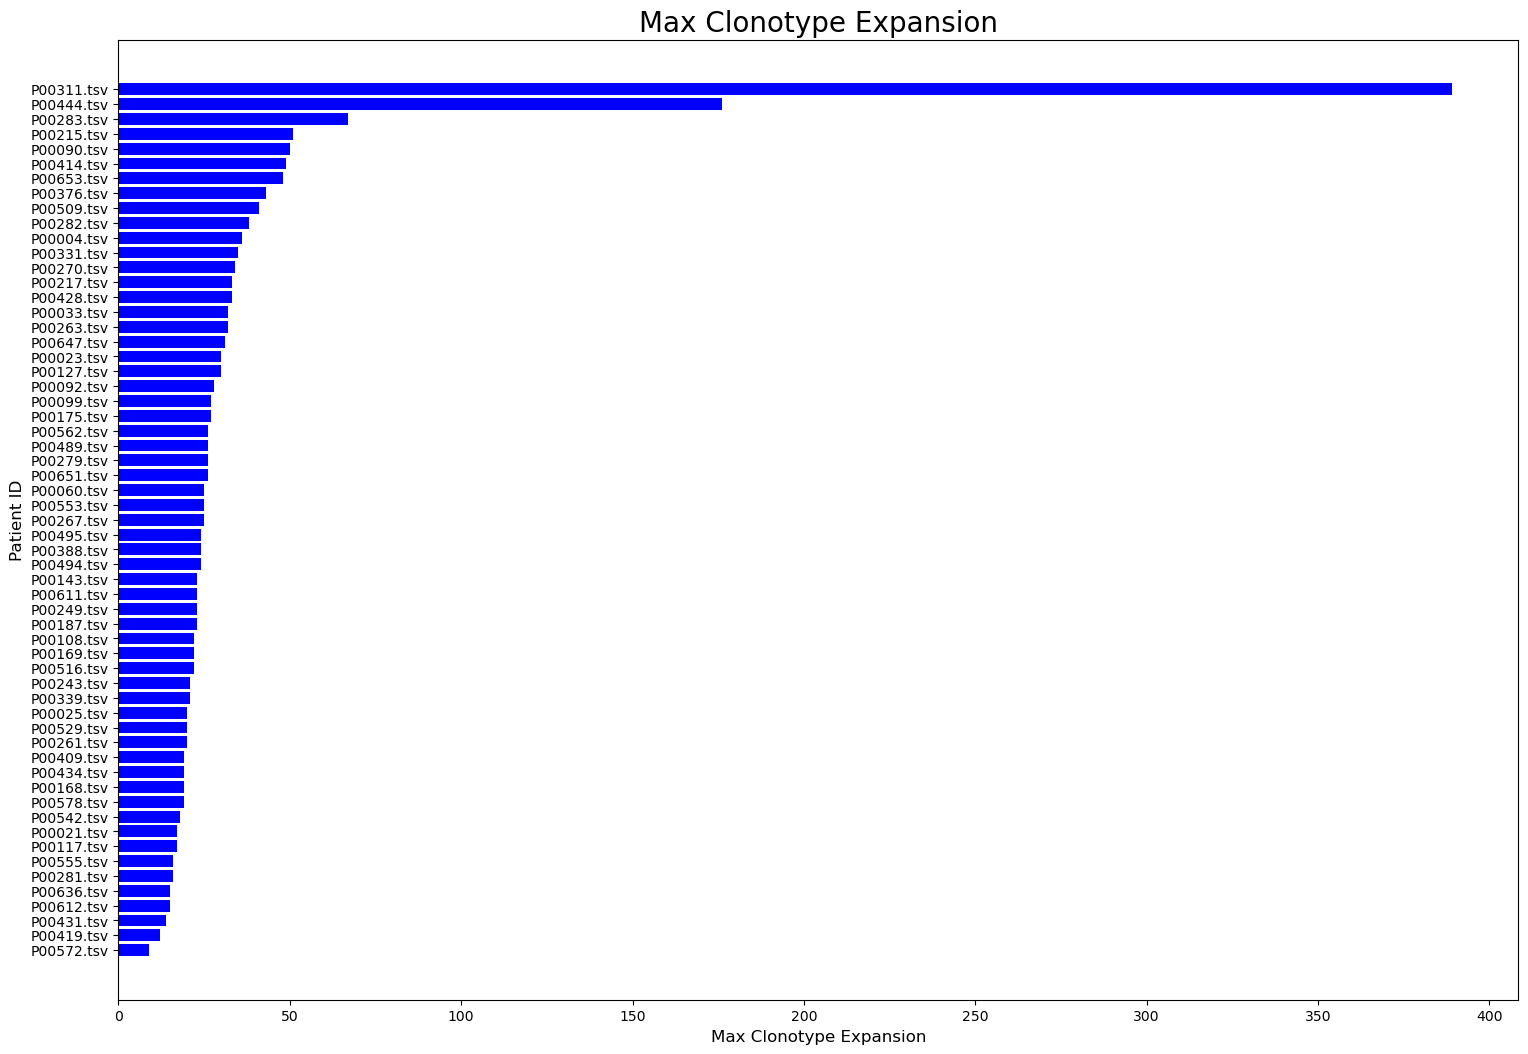

In [69]:
#Sort by max clonotype expansion
expanded_patients_df = expanded_patients_df.sort_values(by='max_clonotype_expansion', ascending=False)

# Plot a bar chart
plt.figure(figsize=(20, 12))
plt.barh(expanded_patients_df['file'], expanded_patients_df['max_clonotype_expansion'], color='blue')

plt.xlabel("Max Clonotype Expansion",fontsize=12)
plt.ylabel("Patient ID",fontsize=12)
plt.title("Max Clonotype Expansion", fontsize=20)


plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top

#Increase the distance between bars
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)
plt.show()


### Visualising top clonotypes for high expanders

P00311:

In [84]:
file_name = 'P00311.tsv'
r311 = pd.read_csv(file_name,sep='\t')

/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/79657113.py:2: DtypeWarning: Columns (81,82,83,88,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  r311 = pd.read_csv(file_name,sep='\t')


In [85]:
print(file_name,'\n')
print(r311['cdr3_amino_acid'].value_counts().head(20))
r311.loc[0,'sample_tags']

P00311.tsv 

cdr3_amino_acid
CASSYSSLSYEQYF      389
CASSYSQGSYEQYF      206
CASRNRDSQFYGYTF     100
CASSYSSLAYEQYF       96
CSARDQGGYTF          37
CASSQDGQGYEQYF       36
CASSYSKLSYEQYF       35
CASSEGDSSYEQYF       35
CASSYSQGAYEQYF       34
CASSYNARETQYF        34
CASSPERGLEETQYF      34
WASRNRDSQFYGYTF      24
PASSDSSGTGADEQFF     24
CSAETGTSNEQFF        24
CASSYSGSSYEQYF       23
CASSLPGNEQYF         23
CSASSGTSDYEQYF       19
SASSDSSGTGADEQFF     18
LASSDSSGTGADEQFF     16
CASSTGGYEQYF         16
Name: count, dtype: int64


'Biological Sex:Male,Cohort:Cohort 01,Ethnic Group:Unknown Ethnicity,HLA MHC class I:HLA-A*02,HLA MHC class I:HLA-A*11,HLA MHC class I:HLA-B*14,HLA MHC class I:HLA-B*35,Inferred HLA type:Inferred HLA-A*02,Inferred HLA type:Inferred HLA-A*11,Inferred HLA type:Inferred HLA-B*14,Inferred HLA type:Inferred HLA-B*35,Inferred HLA type:Inferred HLA-B*44,Racial Group:Unknown racial group,Tissue Source:PBMC,Tissue Source:Peripheral blood lymphocytes (PBL),Tissue Source:T cells,Tissue Source:gDNA,Virus Diseases:Cytomegalovirus -,inferred CMV status:Inferred CMV -'

P0444:

In [79]:
file_name = 'P00444.tsv'
r444 = pd.read_csv(file_name,sep='\t')

/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/1587897252.py:2: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  r444 = pd.read_csv(file_name,sep='\t')


In [83]:
print(file_name,'\n')
print(r444['cdr3_amino_acid'].value_counts().head(20))
r444.loc[0,'sample_tags']

P00444.tsv 

cdr3_amino_acid
CSAREAQAETQYF      176
CASSEAGGPRPQHF     167
CASSFSPDSSHGYTF    153
CASSPRSGAYEQYF     144
CATSDLWETQYF       110
CASSHRQGGTDTQYF     79
CASSPLSGEDGYTF      63
CASSDSGGPDTQYF      62
WASSFSPDSSHGYTF     60
CASSEGRQGVDEQYF     54
CSAQGRTNQPQHF       51
CAWSEGDTQYF         49
CSARDGTGDGGEAFF     49
CSAEYPGEESQPQHF     45
CASSLGAVVTDTQYF     41
CASRLHRGGTDTQYF     39
CASSEDISGANVLTF     36
LNSGANVLTF          35
CATQFGDRDTGELFF     35
CASSPRVSGANVLTF     32
Name: count, dtype: int64


'Biological Sex:Male,Cohort:Cohort 01,Ethnic Group:Unknown Ethnicity,HLA MHC class I:HLA-A*11,HLA MHC class I:HLA-A*24,HLA MHC class I:HLA-B*44,HLA MHC class I:HLA-B*55,Inferred HLA type:Inferred HLA-A*11,Inferred HLA type:Inferred HLA-A*24,Inferred HLA type:Inferred HLA-A*29,Inferred HLA type:Inferred HLA-B*13,Inferred HLA type:Inferred HLA-B*44,Inferred HLA type:Inferred HLA-B*55,Racial Group:Unknown racial group,Tissue Source:PBMC,Tissue Source:Peripheral blood lymphocytes (PBL),Tissue Source:T cells,Tissue Source:gDNA,Virus Diseases:Cytomegalovirus -,inferred CMV status:Inferred CMV -'

P00283:

In [86]:
file_name='P00283.tsv'
r283 = pd.read_csv(file_name,sep='\t')


/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_59700/3710527269.py:2: DtypeWarning: Columns (81,82,83,93,99,100,101,104,105,112,115) have mixed types. Specify dtype option on import or set low_memory=False.
  r283 = pd.read_csv(file_name,sep='\t')


In [87]:
print(file_name,'\n')
print(r283['cdr3_amino_acid'].value_counts().head(20))
r283.loc[0,'sample_tags']

P00283.tsv 

cdr3_amino_acid
CASSLPAGDTGELFF    67
CASSYSDRGEQYF      44
CASSWYTGSYEQYF     37
CASSLAGIYNEQFF     28
CASSLGETQYF        28
CASSQGVNTIYF       25
CASSPETGYVGELFF    25
CASSLYNEQFF        25
CASSSQGRTGELFF     25
CASSFGGDRTDEQFF    24
CASSLTDTQYF        20
CASATGSMNTEAFF     20
CASSYGGTEAFF       19
CARCDGGGAGNTIYF    19
CASSLGDTQYF        19
CASSLSSYEQYF       18
CASSLDSYEQYF       18
CASSPGGTEAFF       18
CASSWTGNQPQHF      17
CASSLGTDTQYF       17
Name: count, dtype: int64


'Age (Range):18-35 Years,Age (Range):24-45 Years (Middle Adulthood),Age (Range):30-34 Years,Age:32 Years,Biological Sex:Female,Cohort:Cohort 01,Ethnic Group:Non-Hispanic or Latino,HLA MHC class I:HLA-A*01,HLA MHC class I:HLA-A*11,HLA MHC class I:HLA-B*13,HLA MHC class I:HLA-B*37,Inferred HLA type:Inferred HLA-A*01,Inferred HLA type:Inferred HLA-A*11,Inferred HLA type:Inferred HLA-B*35,Inferred HLA type:Inferred HLA-B*37,Racial Group:Asian or Pacific Islander,Tissue Source:PBMC,Tissue Source:Peripheral blood lymphocytes (PBL),Tissue Source:T cells,Tissue Source:gDNA,Virus Diseases:Cytomegalovirus +,inferred CMV status:Inferred CMV +'